<a href="https://colab.research.google.com/github/MasterVishvesh/Inventory-Management_LSTMModel/blob/main/Inventory_Management_Regration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.regularizers import l2
from keras.optimizers import Adam
# from sklearn.ensemble import RandomForestRegressor
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [9]:
# !pip install google-auth
# from google.colab import drive
# from google.auth import default

# # Authenticate and create the Drive FUSE wrapper.
# # This will ask for an authorization code.
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/drive')


from google.colab import files
uploaded = files.upload()


Saving sales_prediction_numeric.csv to sales_prediction_numeric.csv


In [10]:
df = pd.read_csv('sales_prediction_numeric.csv')
df.head(10)

,date,store_id,item_id,sales
0,01-01-2020,1,1,23
1,01-01-2020,1,2,12
2,01-01-2020,1,3,25
3,01-01-2020,1,4,39
4,01-01-2020,1,5,18
5,01-01-2020,1,6,20
6,01-01-2020,1,7,26
7,01-01-2020,1,8,13
8,01-01-2020,1,9,21
9,01-01-2020,1,10,20


In [11]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548500 entries, 0 to 548499
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      548500 non-null  object
 1   store_id  548500 non-null  int64 
 2   item_id   548500 non-null  int64 
 3   sales     548500 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 16.7+ MB


In [12]:
list  = df.isnull().sum()
print(list)
df.shape

date        0
store_id    0
item_id     0
sales       0
dtype: int64


(548500, 4)

In [13]:
df1 = df.dropna()
df1.shape
list = df1.isnull().sum()
print(list)

date        0
store_id    0
item_id     0
sales       0
dtype: int64


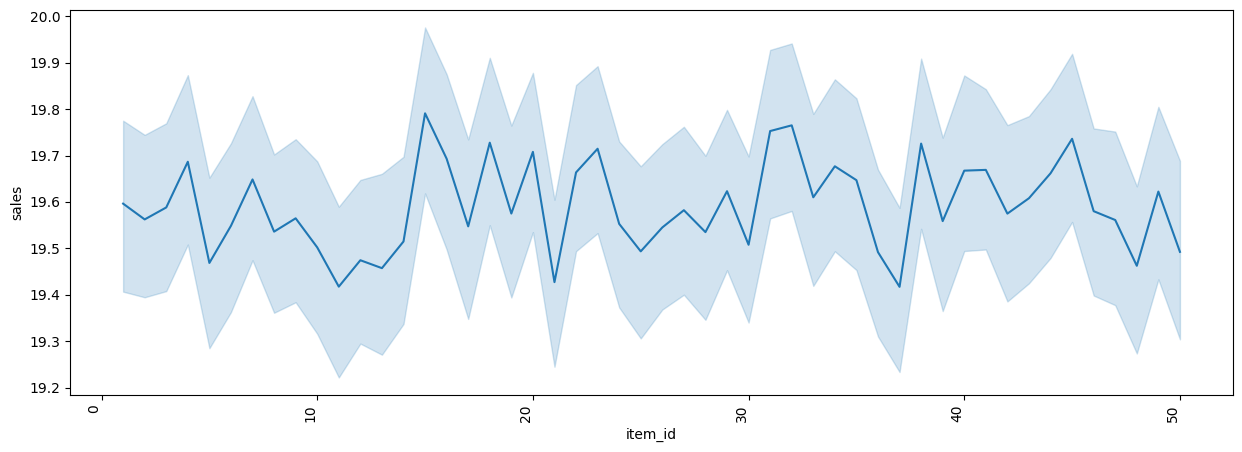

In [14]:
plt.figure(figsize=(15, 5))
sns.lineplot(y='sales', x='item_id', data=df1)

plt.xticks(rotation=90, ha='right')

plt.show()

In [15]:
# Creating lag features
df["lag_1"] = df.groupby(["item_id", "date"])["sales"].shift(1)
df["lag_2"] = df.groupby(["item_id", "date"])["sales"].shift(2)
df["lag_3"] = df.groupby(["item_id", "date"])["sales"].shift(3)


# Rolling averages
df["rolling_mean_3"] = df.groupby("item_id")["sales"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df["rolling_mean_6"] = df.groupby("item_id")["sales"].transform(lambda x: x.rolling(window=6, min_periods=1).mean())
# df.head()
# df.tail()


In [16]:
df.fillna(0, inplace=True)


# Define features and target
features = [ "sales", "lag_1", "rolling_mean_3", "rolling_mean_6", "item_id"]
X = df[features]
y = df["sales"]

# Convert 'item_id' to numerical using Label Encoding
le = LabelEncoder()
#Spli into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# spliting the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)


scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1, 1))


# Reshape input for LSTM
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape to [samples, timesteps, features]
X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1) # Reshape validation data as well
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1) # Reshape validation data as well


In [29]:
# model = Sequential()
model= RandomForestRegressor(n_estimators=100)
# model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01))))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))

optimizer= Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mean_squared_error')


# early_stopping = EarlyStopping(monitor='val_loss', patience=5) # Stop if validation loss doesn't improve for 10 epochs
# model.fit(X_train, y_train)


X_train_2d = X_train.reshape(X_train.shape[0], -1)
model.fit(X_train_2d, y_train)




RandomForestRegressor()

In [34]:
# Fit the model
early_stopping = EarlyStopping(monitor='loss', patience=3)
X_train_2d = X_train.reshape(X_train.shape[0], -1)
model.fit(X_train_2d, y_train)

RandomForestRegressor()

In [37]:
# model.summary()

In [39]:
predictions= model.predict(X_train_2d)
predictions

array([23., 12., 25., ..., 15., 16., 29.])

In [42]:
inv_predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
inv_predictions

array([[1564.],
       [ 816.],
       [1700.],
       ...,
       [1020.],
       [1088.],
       [1972.]])

In [43]:
# inv_y_test = scaler.inverse_transform(y_test)
inv_y_test = scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Reshape y_test to a 2D array
inv_y_test

array([[2516.],
       [1360.],
       [2108.],
       ...,
       [1768.],
       [1496.],
       [ 476.]])

In [48]:
# rmse = np.sqrt(mean_squared_error((inv_predictions - inv_y_test)**2))
# rmse

# Predict on the test set instead of the training set
# predictions = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))  # Reshape X_test for LSTM
X_test_2d = X_test.reshape(X_test.shape[0], -1)
predictions=model.predict(X_test_2d) # Reshape X_test for LSTM, removing .values

# Inverse transform the predictions
# inv_predictions = scaler.inverse_transform(predictions)


inv_predictions = scaler.inverse_transform(predictions.reshape(-1, 1)) # Reshape predictions to a 2D array
# Calculate RMSE using the predictions and actual values from the test set
rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))





# # Calculate RMSE using the predictions and actual values from the test set
# rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))

print(rmse)

0.9382704467134916


In [49]:
ploting_data = pd.DataFrame({'Actual': inv_y_test.flatten(), 'Predicted': inv_predictions.flatten()})
ploting_data

,Actual,Predicted
0,2516.0,2516.0
1,1360.0,1360.0
2,2108.0,2108.0
3,204.0,204.0
4,1088.0,1088.0
...,...,...
109695,1632.0,1632.0
109696,1768.0,1768.0
109697,1768.0,1768.0
109698,1496.0,1496.0


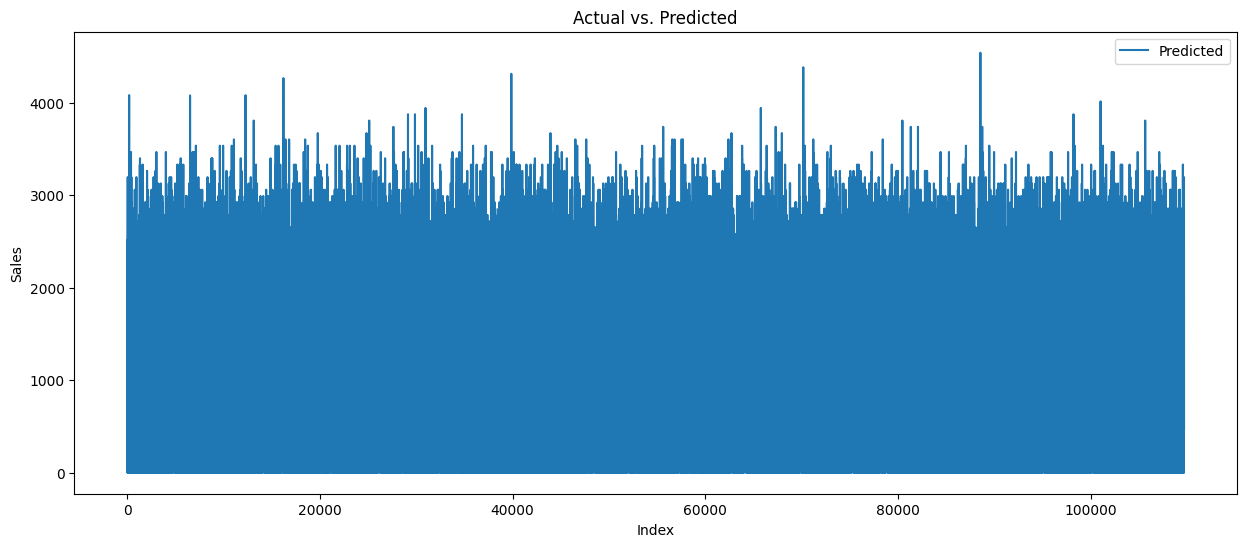

In [50]:
plt.figure(figsize=(15,6))
# plt.plot(ploting_data['Actual'], label='Actual')  # Using 'ploting_data' instead of 'data'
plt.plot(ploting_data['Predicted'], label='Predicted')  # Using 'ploting_data' instead of 'data'
plt.legend()
plt.title('Actual vs. Predicted')
plt.xlabel('Index')  # You might want to adjust the x-axis label
plt.ylabel('Sales')  # Use the actual column name for the y-axis label
plt.show()

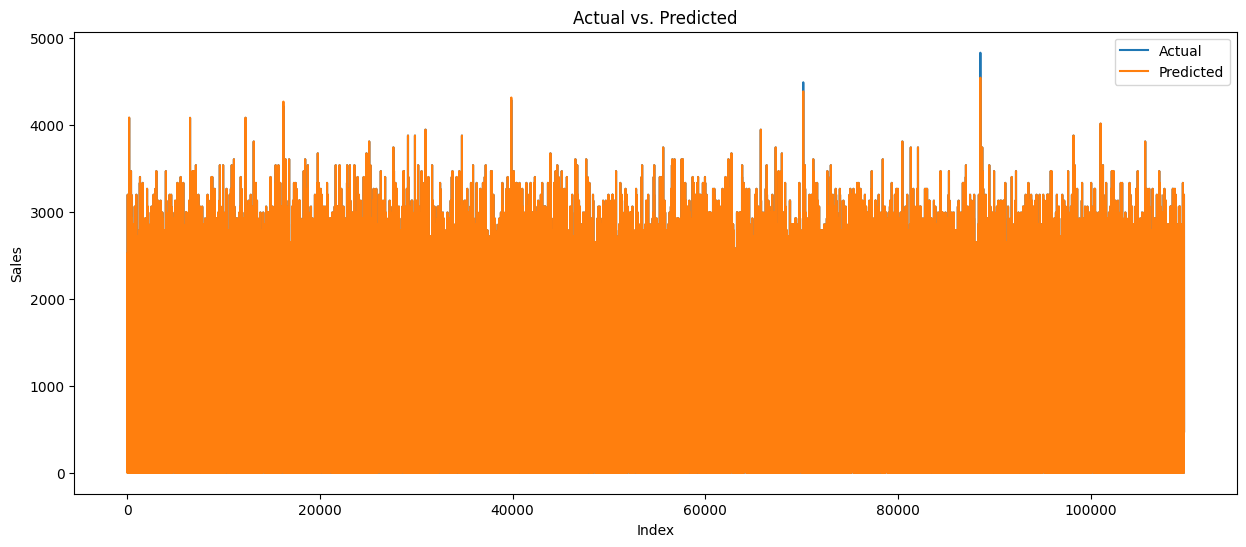

In [51]:
plt.figure(figsize=(15,6))
plt.plot(ploting_data['Actual'], label='Actual')  # Using 'ploting_data' instead of 'data'
plt.plot(ploting_data['Predicted'], label='Predicted')  # Using 'ploting_data' instead of 'data'
plt.legend()
plt.title('Actual vs. Predicted')
plt.xlabel('Index')  # You might want to adjust the x-axis label
plt.ylabel('Sales')  # Use the actual column name for the y-axis label
plt.show()